<a href="https://colab.research.google.com/github/aniyahlater/knn4me/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aniyah McWilliams
Computing ID - Ybf3jw
Outside sources used: https://www.geeksforgeeks.org/python-mean-squared-error/

I used that website to calculate the MSE which is necessary for Question 2.3

https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

I used the previous website for 2.5

Question 1

In [ ]:
! git clone https://github.com/aniyahlater/assignment3
import pandas as pd
import numpy as np
df=pd.read_csv('./assignment3/data/car_data.csv')
print(df.head(10))


Cloning into 'assignment3'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 1), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (11/11), 867.07 KiB | 2.81 MiB/s, done.
Resolving deltas: 100% (1/1), done.
   User ID  Gender  Age  AnnualSalary  Purchased
0      385    Male   35         20000          0
1      681    Male   40         43500          0
2      353    Male   49         74000          0
3      895    Male   40        107500          1
4      661    Male   25         79000          0
5      846  Female   47         33500          1
6      219  Female   46        132500          1
7      588    Male   42         64000          0
8       85  Female   30         84500          0
9      465    Male   41         52000          0


Question 1.2)

In [ ]:
print(df['User ID'].describe())
print(df['Gender'].describe())
print(df['Age'].describe())
print(df['AnnualSalary'].describe())
print(df['Purchased'].describe())



count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: User ID, dtype: float64
count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object
count    1000.000000
mean       40.106000
std        10.707073
min        18.000000
25%        32.000000
50%        40.000000
75%        48.000000
max        63.000000
Name: Age, dtype: float64
count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64
count    1000.000000
mean        0.402000
std         0.490547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchased, dtype: float64


In [ ]:

df['Gender'] = df['Gender'].replace('Female',1)
df['Gender'] = df['Gender'].replace('Male', 0)
print(df['Gender'].value_counts())
print(df['Gender'].value_counts)

1    516
0    484
Name: Gender, dtype: int64
<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64>


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
Y = df['Purchased']
variables = ['Age','AnnualSalary']
X = df.loc[:,variables]
print(X.describe())

#X = df.loc[:,['Age','AnnualSalary']]

               Age   AnnualSalary
count  1000.000000    1000.000000
mean     40.106000   72689.000000
std      10.707073   34488.341867
min      18.000000   15000.000000
25%      32.000000   46375.000000
50%      40.000000   72000.000000
75%      48.000000   90000.000000
max      63.000000  152500.000000


Question 1.3)

In [ ]:
# normalizing the functions
def MaxMin(z):
  z = ((z-min(z))/(max(z)-min(z)))
  return(z)
X = X.apply(MaxMin)
def pn(x):
    print(x,'\n')
    return
pn(X.describe())




               Age  AnnualSalary
count  1000.000000   1000.000000
mean      0.491244      0.419556
std       0.237935      0.250824
min       0.000000      0.000000
25%       0.311111      0.228182
50%       0.488889      0.414545
75%       0.666667      0.545455
max       1.000000      1.000000 



Question 1.4)

In [ ]:
#splitting the sample
from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_Test = train_test_split(X,Y,test_size=.2,random_state=10)

Question 1.5)


[11]


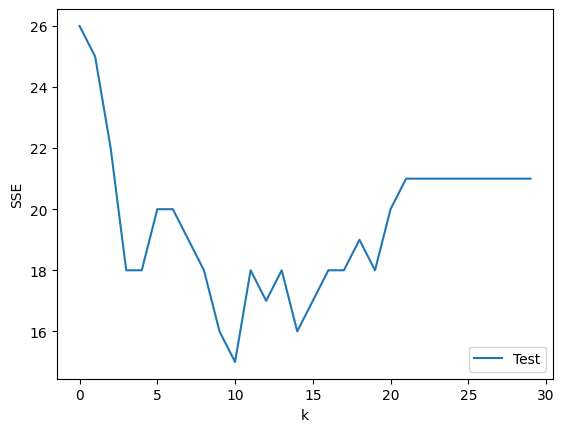

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,Y_Train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum((Y_Test-y_hat)**2) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')


The optimal number of K predictors is 10

Question 1.6)

In [ ]:
model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
fitted_model = model.fit(X_train,Y_Train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set
print(pd.crosstab(Y_Test, y_hat))


col_0        0  1
Purchased        
0          124  2
1           73  1


This model does not seem as accurate. Majority of the the not purchased are categorized as not not purchased,  on the other hand, sold is often categorized as not sold. In essence, not purchased has 2 observations categorized incorrectly, similarly 73 observations are incorrectly categorized as not sold. Our accuracy is 39.5% which is relatively low.

Question 1.6)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

variables2 = ['Gender','Age','AnnualSalary']
xtwo = df.loc[:,variables2]
ytwo = df['Purchased']

xtwo_train, xtwo_test, ytwo_train, ytwo_test = train_test_split(xtwo, ytwo,test_size = .2,random_state = 10)
modelling = KNeighborsClassifier(n_neighbors=9)
fitted_modelling = modelling.fit(xtwo_train.drop('Gender',axis=1),ytwo_train)
y_hat2 = fitted_modelling.predict(xtwo_test.drop('Gender',axis=1))
#
female_yhat = y_hat2[xtwo_test['Gender']=='Female']
female_y = ytwo_test[xtwo_test['Gender']=='Female']
pd.crosstab(female_y,female_yhat)









col_0,0,1
Purchased,,
0,45,13
1,7,32


In [ ]:
male_yhat = y_hat2[xtwo_test['Gender']=='Male']
male_y = ytwo_test[xtwo_test['Gender']=='Male']
pd.crosstab(male_y,male_yhat)

col_0,0,1
Purchased,,
0,57,11
1,11,24


Question 2

I wouldnt say that one model is significantly more accurate at predicting the y variable. However, it should be noted that the female model predicted 2 less wrong cases than the male model.

In [ ]:
import pandas as pd
USA = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')
#print(USA.describe())
# ONLY WANT TO KEEP PRICE YEAR AND MILEAGE
drop_list = ['lot','Unnamed: 0','brand','model','title_status','color','vin','state','country','condition']
USA = USA.drop(drop_list,axis=1)
print('The number of missing values in Price:',np.sum(USA['price'].isnull()))
print('The number of missing values in Year:',np.sum(USA['year'].isnull()))
print('The number of missing values in Mileage:',np.sum(USA['mileage'].isnull()))
print(USA.head(10))

The number of missing values in Price: 0
The number of missing values in Year: 0
The number of missing values in Mileage: 0
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
5   5700  2018    45561
6   7300  2010   149050
7  13350  2017    23525
8  14600  2018     9371
9   5250  2017    63418


There are no missing values that need to be cleaned

Question 2.2 and 2.3)

144408267.95822224


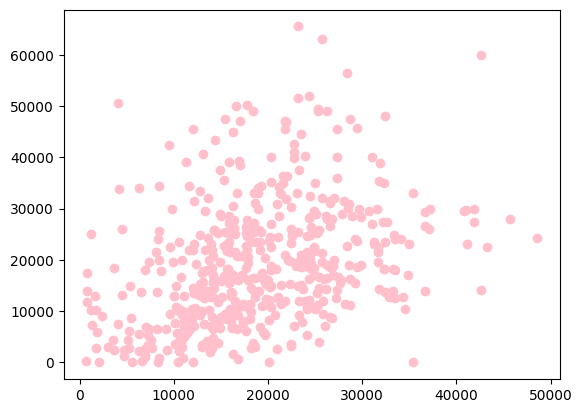

In [ ]:
import seaborn as sns
import pandas as pd
def maxmin(x):
   x = (x-min(x)/max(x)-min(x))
   return(x)
x = USA.loc[:,['mileage','year']]
x = x.apply(maxmin)
y = USA['price']
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_Train1, y_Test1 = train_test_split(x,y,test_size=.2,random_state=1)
def statics(k=3):
  model = kNNRegression(n_neighbors=k)
  fitted_model = model.fit(x_train1, y_Train1)
  y_hat = fitted_model.predict(x_test1)
  plt.scatter(y_hat,y_Test1, color = 'pink')
  MSE = mean_squared_error(y_Test1,y_hat)
  print(MSE)


statics(k=3)


123935054.73422


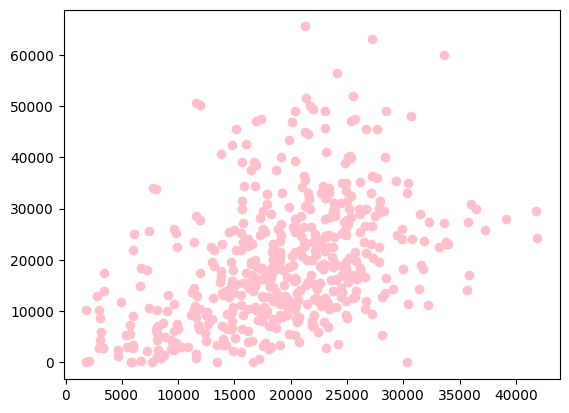

In [ ]:
statics(k=10)


114583927.625184


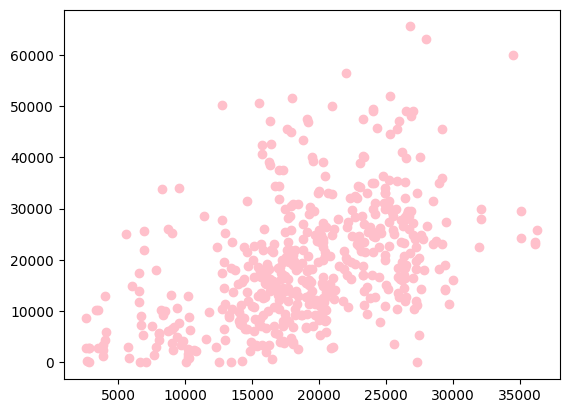

In [ ]:
statics(k=25)

113808282.5131184


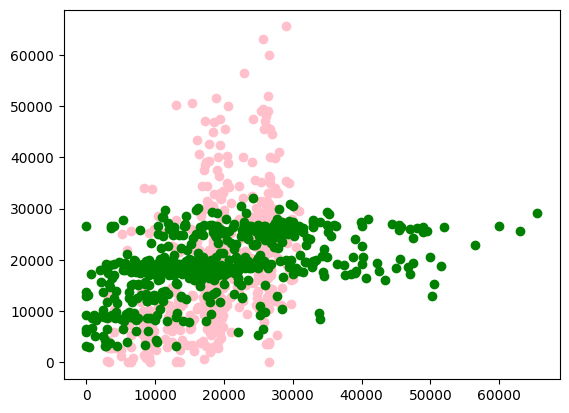

In [ ]:
statics(k=50)


112139348.26186661


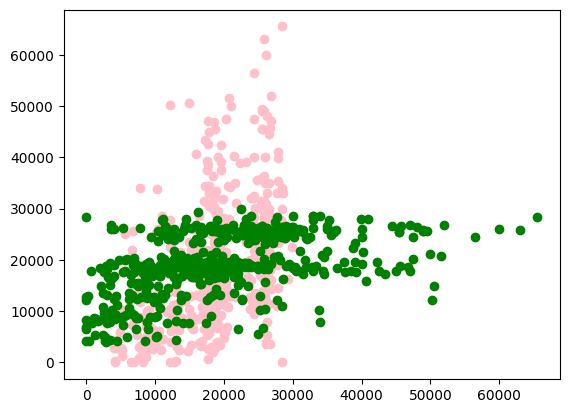

In [ ]:
statics(k=100)

113033731.77488776


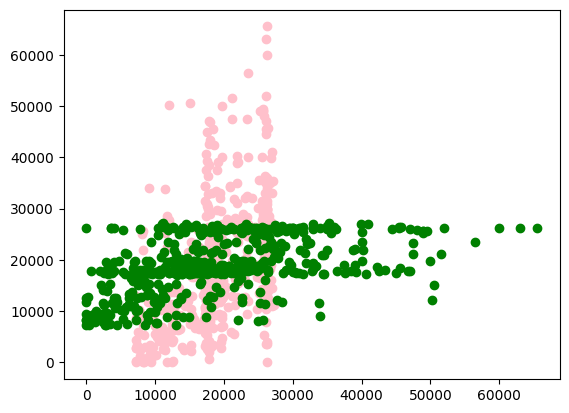

In [ ]:
statics(k=300)

As K increases the mean squared error decreases. This informs us that the error between the predicted value decreases as K increases. Another trend that becomes apparent as the k increase, the predicted values begin to flatten into a straight line under the the 2000 and 3000 y axis line.

Question 2.5)

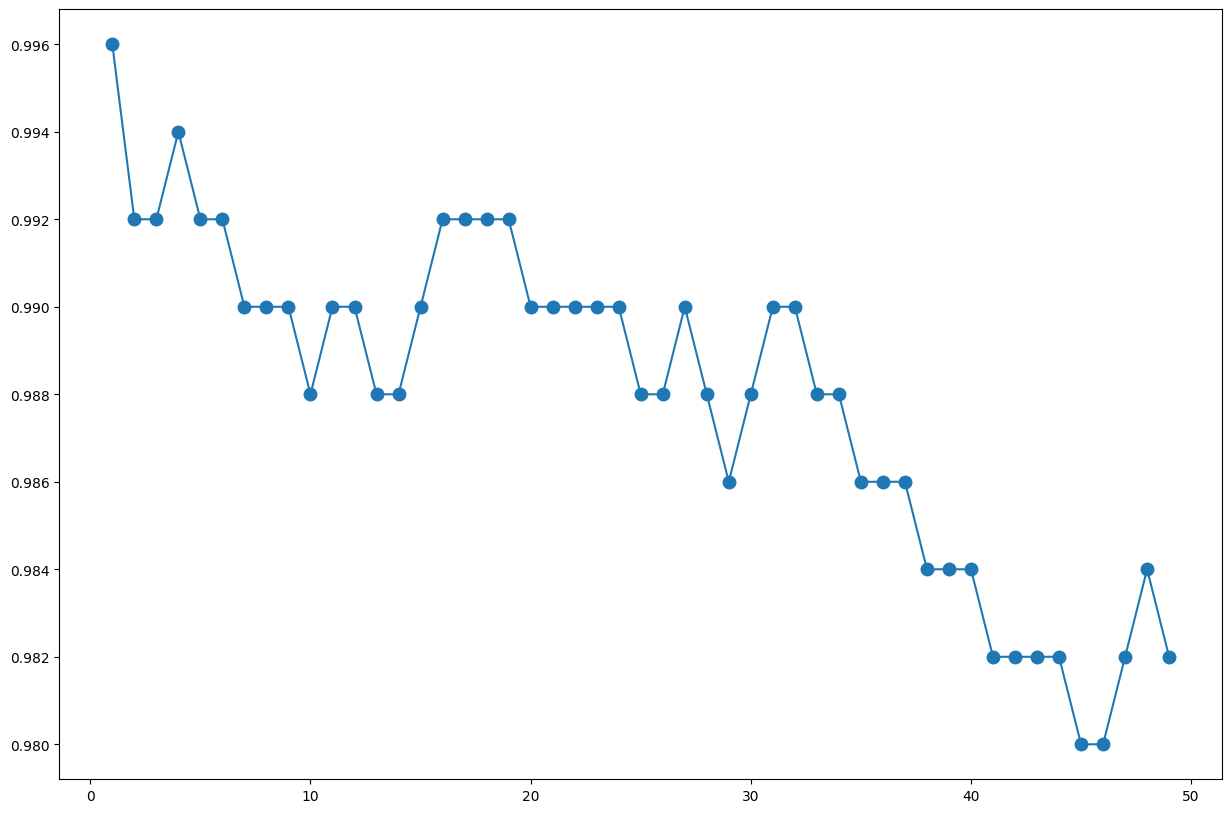

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
k_values = range(1,50)
for i in k_values:
    modeler = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train1, y_Train1)
    prediction = knn.predict(x_test1)
    error_rate.append(np.mean(pred != y_Test1))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

The optimal k value is around 45

Question 3

In [ ]:
health_data = pd.read_csv('./assignment3/data/heart_failure_clinical_records_dataset.csv')
print(health_data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


There are no missing values that need to be cleaned

In [ ]:
health_data = health_data.drop('time',axis=1)
print(health_data.head(10))

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  26

Question 3.2)

In [ ]:
print(health_data.corr())

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  e

The three variables that are the most strongly correlated with the death event variable is age (0.25), ejection_fraction (-0.26), and serum creatinine (0.29).

Question 3.3)


In [ ]:
#CONFIRM THAT A PIVOT TABLE IS SIMPLY A SUMMARY TABLE

vars = ['anaemia', 'smoking', 'diabetes', 'high_blood_pressure', 'sex']
summary_table = health_data.groupby('DEATH_EVENT')[vars].sum()
print(summary_table)


             anaemia  smoking  diabetes  high_blood_pressure  sex
DEATH_EVENT                                                      
0                 83       66        85                   66  132
1                 46       30        40                   39   62


The two variables that seem to have a higher proportion of death related events when the value is 1 are Anaemia and High Blood Pressure.

Question 3.4 and 3.5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
y2 = health_data['DEATH_EVENT']
x2 = health_data.loc[:,['age','serum_creatinine','ejection_fraction','anaemia','high_blood_pressure']]
x2 = x2.apply(maxmin)

Question 3.6)

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=.2,random_state=10)

Question 3.7)

In [ ]:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(x2_train,y2_train) # Train the model on our data
    y_hat = fitted_model.predict(x2_test) # Predict values for test set
    SSE_test[k] = np.sum( (y2_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(x2_train) # Predict values for training set
    SSE_train[k] = np.sum( (y2_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k

pn(SSE_test[k])
print(k_star)
print(SSE_train[k])

10.376326530612245 

[11]
44.3173469387755


The optimal value of K is 11

Question 3.8)

In [ ]:
health_variables = health_data.loc[:,['age','serum_creatinine','ejection_fraction','anaemia','high_blood_pressure','smoking','diabetes','sex','creatinine_phosphokinase','platelets','serum_sodium']]
health_variables = health_variables.apply(maxmin)
healthx_train, healthx_test, healthy_train, healthy_test = train_test_split(health_variables,y2,test_size =.2,random_state =1)
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train1 = np.zeros(k_bar)
SSE_test1 = np.zeros(k_bar)
for k in range(k_bar):
    model1 = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model1 = model1.fit(healthx_train,healthy_train) # Train the model on our data
    y_hat1 = fitted_model1.predict(healthx_test) # Predict values for test set
    SSE_test1[k] = np.sum((healthy_test-y_hat1)**2 ) # Save the computed SSE
    y_hat1 = fitted_model1.predict(healthx_train) # Predict values for training set
    SSE_train1[k] = np.sum( (healthy_train-y_hat1)**2 ) # Save the computed SSE

SSE_min1 = np.min(SSE) # Lowest recorded SSE
min_index1 = np.where(SSE==SSE_min1) # Find the indices of y that equal the minimum
k_star1 = k_grid[min_index] # Find the optimal value of k
print(SSE_test1[k])
print(SSE_train1[k])



11.693469387755101
52.61326530612245


In [ ]:
health_variables = health_data.loc[:,['smoking','diabetes','sex','creatinine_phosphokinase','serum_sodium']]
health_variables = health_variables.apply(maxmin)
healthx1_train, healthx1_test, healthy1_train, healthy1_test = train_test_split(health_variables,y2,test_size =.2,random_state =1)
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train11 = np.zeros(k_bar)
SSE_test11 = np.zeros(k_bar)
for k in range(k_bar):
    model11 = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model11 = model1.fit(healthx1_train,healthy1_train) # Train the model on our data
    y_hat11 = fitted_model1.predict(healthx1_test) # Predict values for test set
    SSE_test11[k] = np.sum((healthy1_test-y_hat11)**2 ) # Save the computed SSE
    y_hat1 = fitted_model1.predict(healthx1_train) # Predict values for training set
    SSE_train1[k] = np.sum( (healthy1_train-y_hat1)**2 ) # Save the computed SSE

SSE_min11 = np.min(SSE) # Lowest recorded SSE
min_index11 = np.where(SSE==SSE_min11) # Find the indices of y that equal the minimum
k_star11 = k_grid[min_index] # Find the optimal value of k
print(SSE_test11[k])
print(SSE_train11[k])

11.327346938775507
0.0


The model that only uses the 5 variables has a lower SSE. For reference the 5 variables that I used in the model were Age, Serum Creatinine, Ejection Fraction, Anaemia and High Blood Pressure. Compairing just these two models I rather use the model with 5 variables due to its lower SSE (10.37) compared to including all the variables (11.69).Interestingly, I dont think the the difference is significantly large compared to the large increase in variables being included. Playing around with the included variables we see that when I remove the 5 variables I thought to be the most important in predicting death event had a SSE of 11.7. A slight pattern that begins to emerge is that as the variables increase (after removing the ones I thought were important) the SSE begins to slighty increase, highlighting that the model does not have a good of a fit compared to other models. This could evidence that the number variables are not as important in determining how good of a fit your model is, rather the quality of the variables included, in predicting your y variable.